Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=0.997, loss_val=0.997, train=62.6%, val=62.3%
End of epoch 3: loss_tr=0.835, loss_val=0.836, train=68.1%, val=68.4%
End of epoch 5: loss_tr=0.835, loss_val=0.833, train=67.7%, val=67.7%
End of epoch 7: loss_tr=0.784, loss_val=0.783, train=70.0%, val=70.2%
End of epoch 9: loss_tr=0.723, loss_val=0.722, train=72.7%, val=72.8%
End of epoch 11: loss_tr=0.742, loss_val=0.742, train=72.0%, val=72.2%
End of epoch 

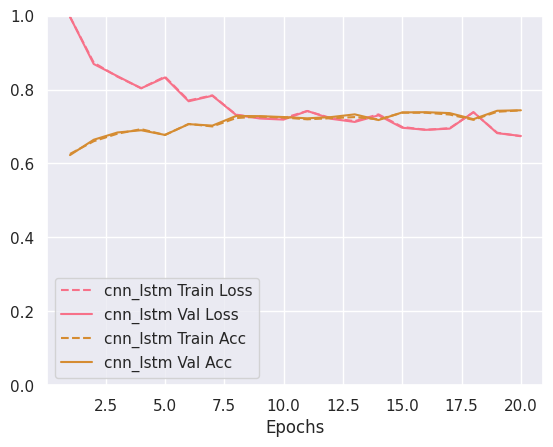

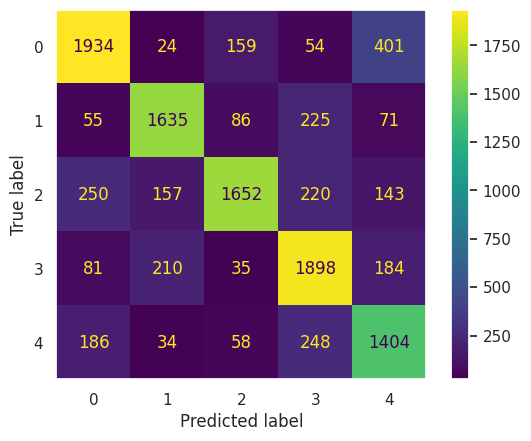

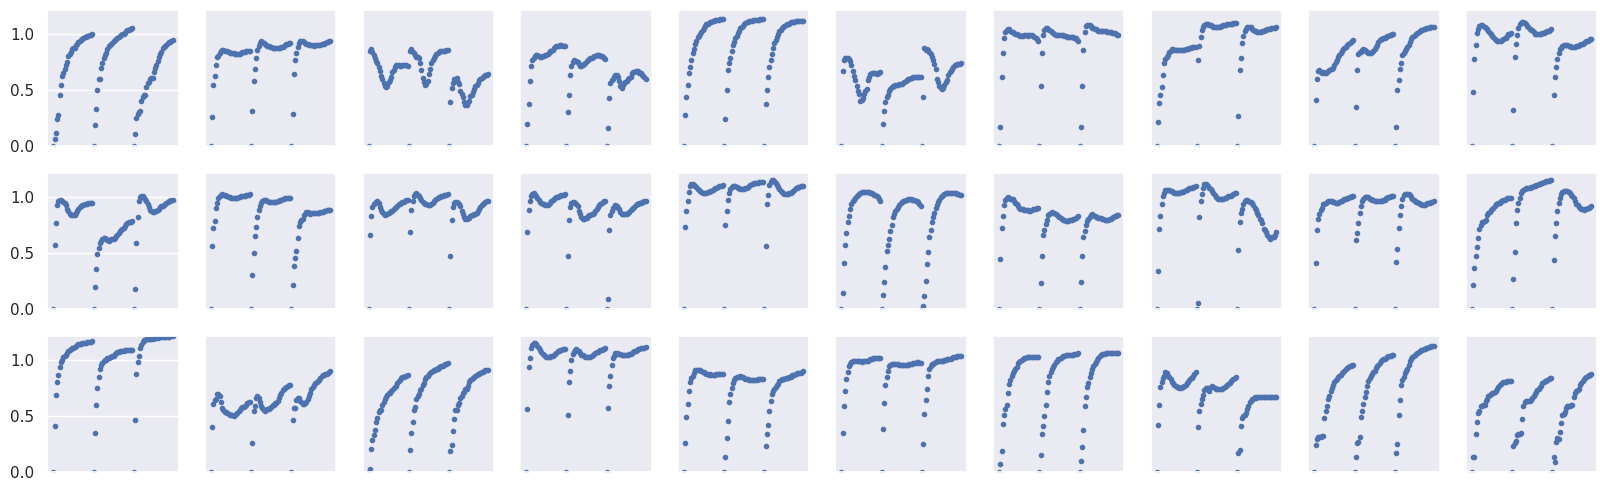

In [1]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.data import Data 
from peratouch.trainer import Trainer
from peratouch.results import Results 
from peratouch.networks import cnn_lstm
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm(input_ch=3, n_filters_start=8, hidden_lstm=16, out_size=5) 
T = Trainer(D)
T.setup(model, learning_rate=5e-2, weight_decay=1e-3, batch_size=5000, max_epochs=20, verbose=True)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.441, loss_val=1.442, train=38.3%, val=37.9%
End of epoch 3: loss_tr=1.245, loss_val=1.245, train=49.8%, val=49.9%
End of epoch 5: loss_tr=1.088, loss_val=1.086, train=56.0%, val=56.2%
End of epoch 7: loss_tr=0.995, loss_val=0.991, train=60.7%, val=61.1%
End of epoch 9: loss_tr=0.979, loss_val=0.973, train=61.3%, val=61.8%
End of epoch 11: loss_tr=0.931, loss_val=0.924, train=63.6%, val=64.4%
End of epoch 

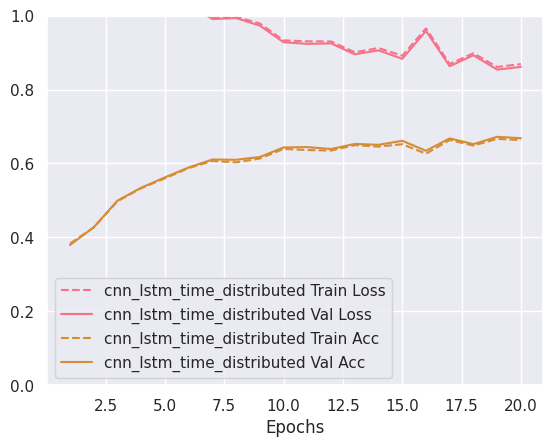

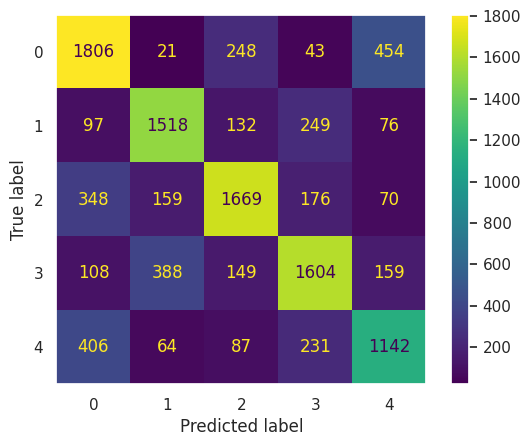

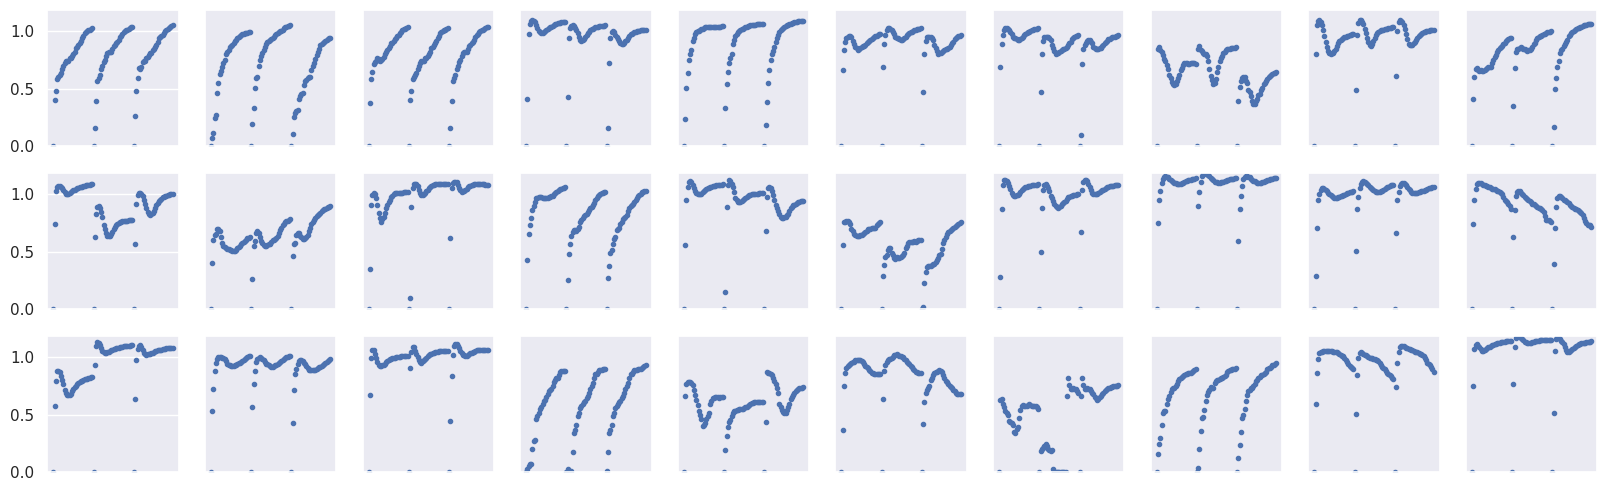

In [2]:
# Case of time-distributed cnn-lstm 
from peratouch.data import Data 
from peratouch.trainer import Trainer
from peratouch.results import Results 
from peratouch.networks import cnn_lstm_time_distributed
from peratouch.config import datapath_five_users

input_size = 32 
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm_time_distributed(input_size=input_size, out_size=5, global_pool=False) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=20)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()